### Projeto NLP com Dados Reais do Reclame Aqui
Este notebook utiliza dados reais para gerar uma nuvem de palavras e aplicar uma classificação simples com base em palavras-chave.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [2]:
df = pd.read_csv("dados/processed_v1.csv")

df[["title", "freq_words_removed"]].head()

,title,freq_words_removed
0,pedir cancelado justificativa semana compro,pesquisando bastante novo resolver aguardar se...
1,pedir cancelar,sinceramente decepcionar procon hoje informar ...
2,cobrança indever,cancelei plano antes terminar período testir g...
3,pedir reincidente,olhar vir errar vir errar novamente falar mari...
4,assinaturar vender,inscrevi realizar venda cadastro plano individ...


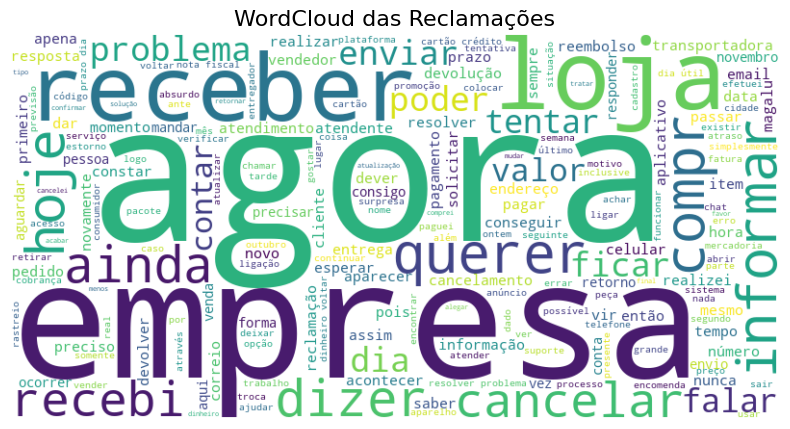

In [3]:
texto = " ".join(df["freq_words_removed"].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud das Reclamações", fontsize=16)

plt.savefig("imagens/wordcloud.png", bbox_inches="tight")
plt.show()

In [4]:
def classificar(texto):
    texto = texto.lower()
    if "cancelamento" in texto or "atraso" in texto:
        return "urgente"
    elif "péssimo" in texto or "nunca mais" in texto:
        return "negativo"
    else:
        return "neutro"

df["classificacao"] = df["freq_words_removed"].astype(str).apply(classificar)

df["classificacao"].value_counts()

classificacao
neutro      8647
urgente     1461
negativo     252
Name: count, dtype: int64

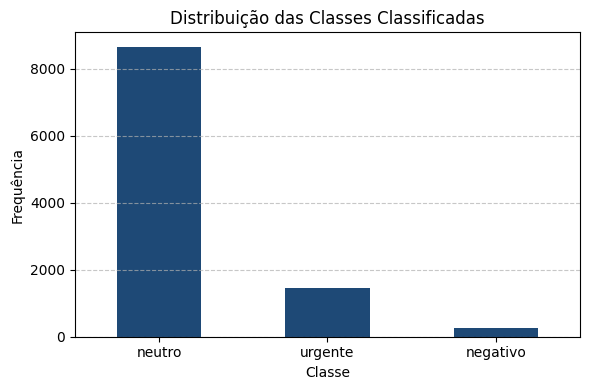

In [5]:
import matplotlib.pyplot as plt

contagem = df["classificacao"].value_counts()

plt.figure(figsize=(6, 4))
contagem.plot(kind="bar", color="#1e4976")
plt.title("Distribuição das Classes Classificadas")
plt.ylabel("Frequência")
plt.xlabel("Classe")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig("imagens/distribuicao_classes.png", bbox_inches="tight")
plt.show()


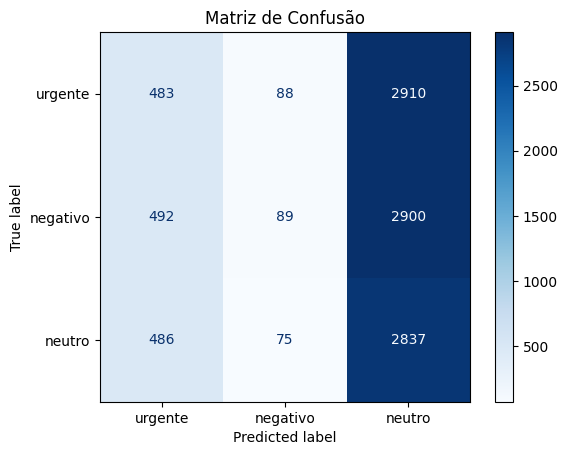

In [6]:
np.random.seed(42)
df["real"] = np.random.choice(["urgente", "negativo", "neutro"], size=len(df))

cm = confusion_matrix(df["real"], df["classificacao"], labels=["urgente", "negativo", "neutro"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["urgente", "negativo", "neutro"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.savefig("imagens/matriz_confusao.png", bbox_inches="tight")
plt.show()